In [1]:
import pandas as pd
import numpy as np
import os 
import statistics 
from pathlib import Path
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
import math
from statsmodels.stats.anova import AnovaRM
from numpy import mean, std, cov
from numpy.random import seed, randn
import random as rd
#from sklearn import preprocessing
#from sklearn import datasets
#from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA
import matplotlib.pyplot as pltx
from matplotlib import pyplot
from __future__ import division
import sys
import scipy
from math import sqrt
import scipy.stats as stats
from scipy import stats 
from scipy.stats import t, pearsonr, sem, spearmanr
import seaborn as sns
from statistics import mean, stdev
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math
#import pingouin as pg
#from pingouin import ttest
from scipy.special import logsumexp
from pathlib import Path
import seaborn as sns

In [2]:
#go to current directory and upload behavioral data
#path = os.chdir('/mnt/disk01/farerilab/GitHub/WTP_Rejection_Choice')

current_dir = os.getcwd()
shortformdata = pd.read_csv('shortformdata.csv')
longformdata = pd.read_csv('longformdata.csv')


#create sepeate dataframes with values for within each condition
rej = shortformdata.loc[shortformdata['condition_recode']==1].reset_index(drop=True)
acc = shortformdata.loc[shortformdata['condition_recode']==2].reset_index(drop=True)

rej_long = longformdata.loc[longformdata['condition_recode']==1].reset_index(drop=True)
acc_long = longformdata.loc[longformdata['condition_recode']==2].reset_index(drop=True)



In [3]:
#print(path)

In [4]:
#import the individual difference measure csvs
#scoringpath = os.chdir('/mnt/disk01/farerilab/GitHub/WTP_Rejection_Choice/scoring')
scoringpath = os.chdir('/users/jordansiegel/Documents/GitHub/WTP_Rejection_Choice/scoring')

aq = pd.read_csv('aq.csv')
ntbs = pd.read_csv('ntbs.csv')
rsq = pd.read_csv('rsq.csv')
scs = pd.read_csv('scs.csv')
mspss = pd.read_csv('mspss.csv')

In [5]:
#create columns that represent the value differences between social and non social choices in each condition

rej['valuediff_mean']= rej ['social_decisionprice_mean'] - rej ['nonsocial_decisionprice_mean']
print(rej['valuediff_mean'])

acc['valuediff_mean']= acc ['social_decisionprice_mean'] - acc ['nonsocial_decisionprice_mean']
print(acc['valuediff_mean'])

0    -0.001923
1    -0.002594
2    -0.006471
3    -0.001200
4     0.000853
        ...   
93    0.002083
94    0.005357
95    0.000877
96    0.000696
97    0.000400
Name: valuediff_mean, Length: 98, dtype: float64
0     0.002244
1    -0.003382
2     0.001698
3    -0.001039
4     0.004687
        ...   
93   -0.007238
94    0.001234
95    0.004070
96   -0.003579
97    0.000800
Name: valuediff_mean, Length: 98, dtype: float64


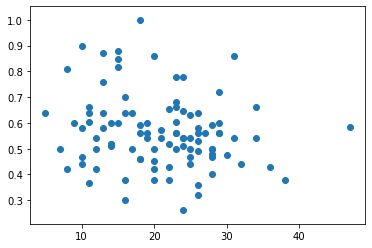

[[ 5.87944456e+01 -1.87967742e-01]
 [-1.87967742e-01  1.95730589e-02]]
Spearmans correlation: -0.163
p value: 0.1097
Accept null hypothesis that the means are equal.


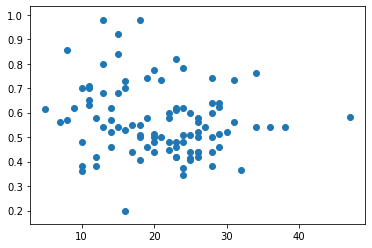

[[ 5.87944456e+01 -1.80562595e-01]
 [-1.80562595e-01  2.03013161e-02]]
Spearmans correlation: -0.169
p value: 0.0971
Accept null hypothesis that the means are equal.


In [11]:
# prop_socialchoice_ // AQ
pyplot.scatter(aq['AQ'],rej['prop_socialchoice'])
pyplot.show()
covariance = cov(aq['AQ'],rej['prop_socialchoice'])
print(covariance)
corr, _ = spearmanr(aq['AQ'],rej['prop_socialchoice'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(aq['AQ'],rej['prop_socialchoice'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
    
pyplot.scatter(aq['AQ'],acc['prop_socialchoice'])
pyplot.show()
covariance = cov(aq['AQ'],acc['prop_socialchoice'])
print(covariance)
corr, _ = spearmanr(aq['AQ'],acc['prop_socialchoice'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(aq['AQ'],acc['prop_socialchoice'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
    

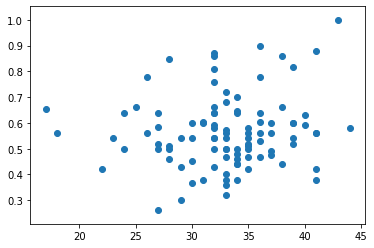

[[2.55351357e+01 9.48355896e-02]
 [9.48355896e-02 1.95730589e-02]]
Spearmans correlation: 0.085
p value: 0.4071
Accept null hypothesis that the means are equal.


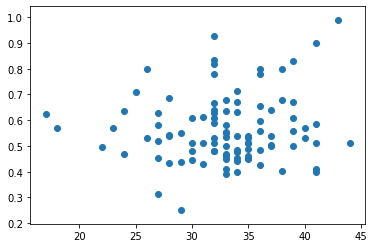

[[2.55351357e+01 6.99131209e-02]
 [6.99131209e-02 1.74078102e-02]]
Spearmans correlation: 0.027
p value: 0.7924
Accept null hypothesis that the means are equal.


In [13]:
# prop_socialchoice_ // NTBS
pyplot.scatter(ntbs['NTBS_score'],rej['prop_socialchoice'])
pyplot.show()
covariance = cov(ntbs['NTBS_score'],rej['prop_socialchoice'])
print(covariance)
corr, _ = spearmanr(ntbs['NTBS_score'],rej['prop_socialchoice'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(ntbs['NTBS_score'],rej['prop_socialchoice'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
    
pyplot.scatter(ntbs['NTBS_score'],acc['overall_prop_social_choice'])
pyplot.show()
covariance = cov(ntbs['NTBS_score'],acc['overall_prop_social_choice'])
print(covariance)
corr, _ = spearmanr(ntbs['NTBS_score'],acc['overall_prop_social_choice'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(ntbs['NTBS_score'],acc['overall_prop_social_choice'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

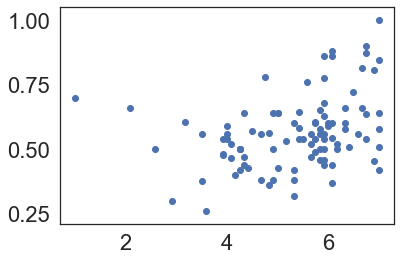

[[1.40585551 0.05623913]
 [0.05623913 0.01957306]]
Spearmans correlation: 0.358
p value: 0.0003
Reject the null hypothesis that the means are equal.


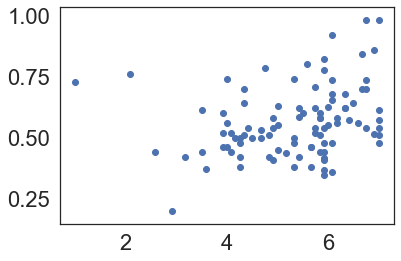

[[1.40585551 0.045038  ]
 [0.045038   0.02030132]]
Spearmans correlation: 0.317
p value: 0.0015
Reject the null hypothesis that the means are equal.


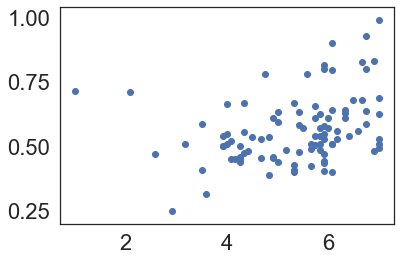

[[1.40585551 0.05068377]
 [0.05068377 0.01740781]]
Spearmans correlation: 0.381
p value: 0.0001
Reject the null hypothesis that the means are equal.


In [36]:
# prop_socialchoice_ // MSPSS
pyplot.scatter(mspss['MSPSS_score'],rej['prop_socialchoice'])
pyplot.show()
covariance = cov(mspss['MSPSS_score'],rej['prop_socialchoice'])
print(covariance)
corr, _ = spearmanr(mspss['MSPSS_score'],rej['prop_socialchoice'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(mspss['MSPSS_score'],rej['prop_socialchoice'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
    
pyplot.scatter(mspss['MSPSS_score'],acc['prop_socialchoice'])
pyplot.show()
covariance = cov(mspss['MSPSS_score'],acc['prop_socialchoice'])
print(covariance)
corr, _ = spearmanr(mspss['MSPSS_score'],acc['prop_socialchoice'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(mspss['MSPSS_score'],acc['prop_socialchoice'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
    
    pyplot.scatter(mspss['MSPSS_score'],acc['overall_prop_social_choice'])
pyplot.show()
covariance = cov(mspss['MSPSS_score'],acc['overall_prop_social_choice'])
print(covariance)
corr, _ = spearmanr(mspss['MSPSS_score'],acc['overall_prop_social_choice'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(mspss['MSPSS_score'],acc['overall_prop_social_choice'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    


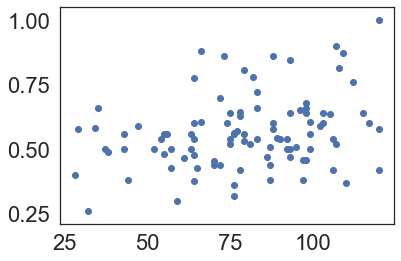

[[5.10737745e+02 9.27952508e-01]
 [9.27952508e-01 1.95730589e-02]]
Spearmans correlation: 0.271
p value: 0.0069
Reject the null hypothesis that the means are equal.


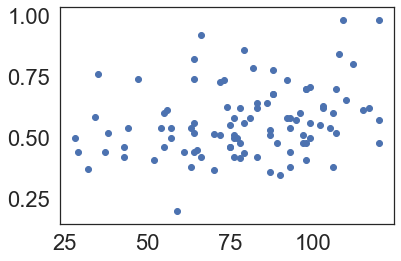

[[5.10737745e+02 8.72500675e-01]
 [8.72500675e-01 2.03013161e-02]]
Spearmans correlation: 0.280
p value: 0.0053
Reject the null hypothesis that the means are equal.


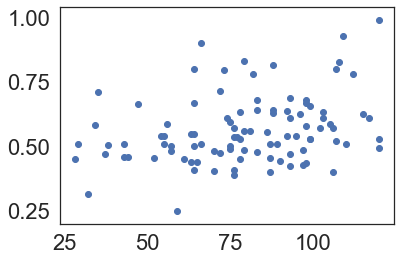

[[5.10737745e+02 9.00546257e-01]
 [9.00546257e-01 1.74078102e-02]]
Spearmans correlation: 0.302
p value: 0.0025
Reject the null hypothesis that the means are equal.


In [37]:
# prop_socialchoice_ // SCS

pyplot.scatter(scs['SCS_score'],rej['prop_socialchoice'])
pyplot.show()
covariance = cov(scs['SCS_score'],rej['prop_socialchoice'])
print(covariance)
corr, _ = spearmanr(scs['SCS_score'],rej['prop_socialchoice'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(scs['SCS_score'],rej['prop_socialchoice'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
    
pyplot.scatter(scs['SCS_score'],acc['prop_socialchoice'])
pyplot.show()
covariance = cov(scs['SCS_score'],acc['prop_socialchoice'])
print(covariance)
corr, _ = spearmanr(scs['SCS_score'],acc['prop_socialchoice'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(scs['SCS_score'],acc['prop_socialchoice'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
        
pyplot.scatter(scs['SCS_score'],acc['overall_prop_social_choice'])
pyplot.show()
covariance = cov(scs['SCS_score'],acc['overall_prop_social_choice'])
print(covariance)
corr, _ = spearmanr(scs['SCS_score'],acc['overall_prop_social_choice'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(scs['SCS_score'],acc['overall_prop_social_choice'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

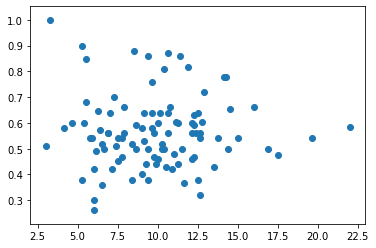

[[ 1.16294462e+01 -4.08534854e-03]
 [-4.08534854e-03  1.95730589e-02]]
Spearmans correlation: 0.043
p value: 0.6768
Accept null hypothesis that the means are equal.


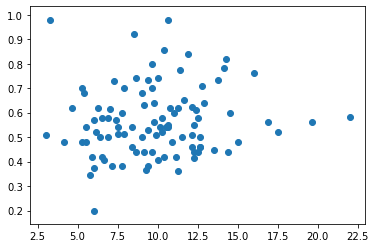

[[11.62944621  0.04683209]
 [ 0.04683209  0.02030132]]
Spearmans correlation: 0.129
p value: 0.2054
Accept null hypothesis that the means are equal.


In [16]:
# prop_socialchoice_ // RSQ

pyplot.scatter(rsq['RSQ_finalscore'],rej['prop_socialchoice'])
pyplot.show()
covariance = cov(rsq['RSQ_finalscore'],rej['prop_socialchoice'])
print(covariance)
corr, _ = spearmanr(rsq['RSQ_finalscore'],rej['prop_socialchoice'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(rsq['RSQ_finalscore'],rej['prop_socialchoice'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
    
pyplot.scatter(rsq['RSQ_finalscore'],acc['prop_socialchoice'])
pyplot.show()
covariance = cov(rsq['RSQ_finalscore'],acc['prop_socialchoice'])
print(covariance)
corr, _ = spearmanr(rsq['RSQ_finalscore'],acc['prop_socialchoice'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(rsq['RSQ_finalscore'],acc['prop_socialchoice'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

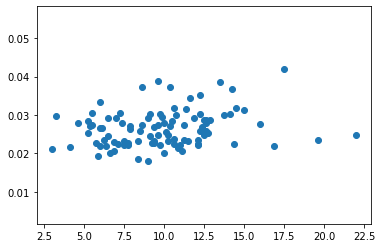

[[1.16294462e+01 3.72624024e-03]
 [3.72624024e-03 2.26778215e-05]]
Spearmans correlation: 0.237
p value: 0.0190
Reject the null hypothesis that the means are equal.


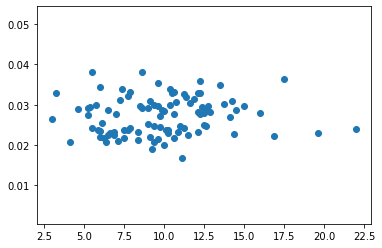

[[1.16294462e+01 1.29584614e-03]
 [1.29584614e-03 2.18218800e-05]]
Spearmans correlation: 0.146
p value: 0.1515
Accept null hypothesis that the means are equal.


In [17]:
# social_decisionprice_mean // RSQ

pyplot.scatter(rsq['RSQ_finalscore'],rej['social_decisionprice_mean'])
pyplot.show()
covariance = cov(rsq['RSQ_finalscore'],rej['social_decisionprice_mean'])
print(covariance)
corr, _ = spearmanr(rsq['RSQ_finalscore'],rej['social_decisionprice_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(rsq['RSQ_finalscore'],rej['social_decisionprice_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
    
pyplot.scatter(rsq['RSQ_finalscore'],acc['social_decisionprice_mean'])
pyplot.show()
covariance = cov(rsq['RSQ_finalscore'],acc['social_decisionprice_mean'])
print(covariance)
corr, _ = spearmanr(rsq['RSQ_finalscore'],acc['social_decisionprice_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(rsq['RSQ_finalscore'],acc['social_decisionprice_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

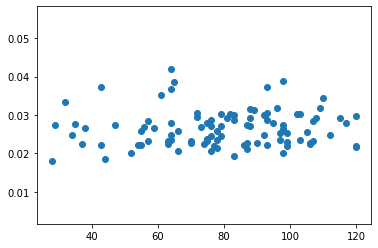

[[5.10737745e+02 6.84273569e-03]
 [6.84273569e-03 2.26778215e-05]]
Spearmans correlation: 0.113
p value: 0.2675
Accept null hypothesis that the means are equal.


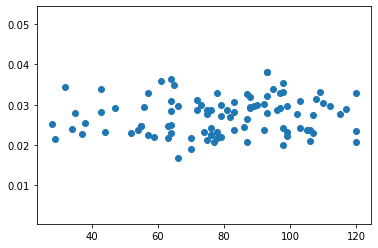

[[5.10737745e+02 1.29206057e-02]
 [1.29206057e-02 2.18218800e-05]]
Spearmans correlation: 0.132
p value: 0.1960
Accept null hypothesis that the means are equal.


In [18]:
# social_decisionprice_mean // SCS

pyplot.scatter(scs['SCS_score'],rej['social_decisionprice_mean'])
pyplot.show()
covariance = cov(scs['SCS_score'],rej['social_decisionprice_mean'])
print(covariance)
corr, _ = spearmanr(scs['SCS_score'],rej['social_decisionprice_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(scs['SCS_score'],rej['social_decisionprice_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
    
pyplot.scatter(scs['SCS_score'],acc['social_decisionprice_mean'])
pyplot.show()
covariance = cov(scs['SCS_score'],acc['social_decisionprice_mean'])
print(covariance)
corr, _ = spearmanr(scs['SCS_score'],acc['social_decisionprice_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(scs['SCS_score'],acc['social_decisionprice_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

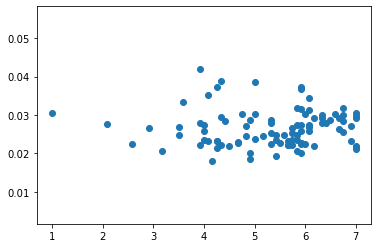

[[1.40585551e+00 3.07967633e-05]
 [3.07967633e-05 2.26778215e-05]]
Spearmans correlation: 0.124
p value: 0.2231
Accept null hypothesis that the means are equal.


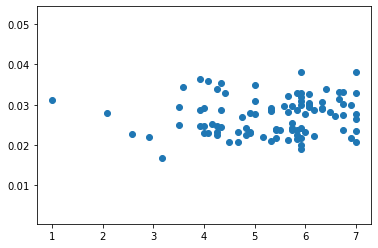

[[1.40585551e+00 6.57738814e-04]
 [6.57738814e-04 2.18218800e-05]]
Spearmans correlation: 0.157
p value: 0.1218
Accept null hypothesis that the means are equal.


In [19]:
# social_decisionprice_mean // MSPSS
pyplot.scatter(mspss['MSPSS_score'],rej['social_decisionprice_mean'])
pyplot.show()
covariance = cov(mspss['MSPSS_score'],rej['social_decisionprice_mean'])
print(covariance)
corr, _ = spearmanr(mspss['MSPSS_score'],rej['social_decisionprice_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(mspss['MSPSS_score'],rej['social_decisionprice_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
    
pyplot.scatter(mspss['MSPSS_score'],acc['social_decisionprice_mean'])
pyplot.show()
covariance = cov(mspss['MSPSS_score'],acc['social_decisionprice_mean'])
print(covariance)
corr, _ = spearmanr(mspss['MSPSS_score'],acc['social_decisionprice_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(mspss['MSPSS_score'],acc['social_decisionprice_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

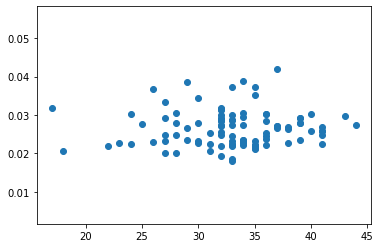

[[2.55351357e+01 1.08176872e-03]
 [1.08176872e-03 2.26778215e-05]]
Spearmans correlation: 0.056
p value: 0.5835
Accept null hypothesis that the means are equal.


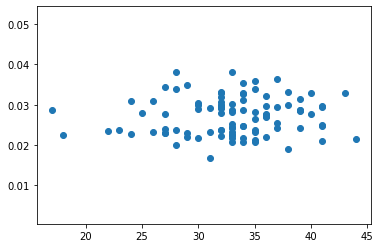

[[2.55351357e+01 1.78013872e-03]
 [1.78013872e-03 2.18218800e-05]]
Spearmans correlation: 0.074
p value: 0.4675
Accept null hypothesis that the means are equal.


In [20]:
# social_decisionprice_mean // NTBS
pyplot.scatter(ntbs['NTBS_score'],rej['social_decisionprice_mean'])
pyplot.show()
covariance = cov(ntbs['NTBS_score'],rej['social_decisionprice_mean'])
print(covariance)
corr, _ = spearmanr(ntbs['NTBS_score'],rej['social_decisionprice_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(ntbs['NTBS_score'],rej['social_decisionprice_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
    
pyplot.scatter(ntbs['NTBS_score'],acc['social_decisionprice_mean'])
pyplot.show()
covariance = cov(ntbs['NTBS_score'],acc['social_decisionprice_mean'])
print(covariance)
corr, _ = spearmanr(ntbs['NTBS_score'],acc['social_decisionprice_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(ntbs['NTBS_score'],acc['social_decisionprice_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

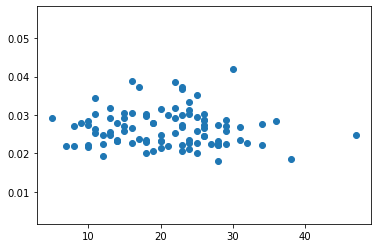

[[ 5.87944456e+01 -2.03390414e-03]
 [-2.03390414e-03  2.26778215e-05]]
Spearmans correlation: -0.071
p value: 0.4865
Accept null hypothesis that the means are equal.


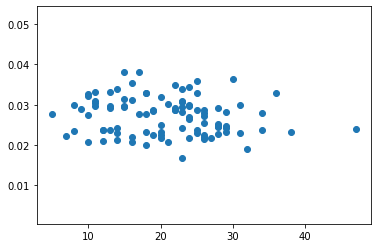

[[ 5.87944456e+01 -5.32210177e-03]
 [-5.32210177e-03  2.18218800e-05]]
Spearmans correlation: -0.149
p value: 0.1427
Accept null hypothesis that the means are equal.


In [21]:
# social_decisionprice_mean // AQ
pyplot.scatter(aq['AQ'],rej['social_decisionprice_mean'])
pyplot.show()
covariance = cov(aq['AQ'],rej['social_decisionprice_mean'])
print(covariance)
corr, _ = spearmanr(aq['AQ'],rej['social_decisionprice_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(aq['AQ'],rej['social_decisionprice_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
    
pyplot.scatter(aq['AQ'],acc['social_decisionprice_mean'])
pyplot.show()
covariance = cov(aq['AQ'],acc['social_decisionprice_mean'])
print(covariance)
corr, _ = spearmanr(aq['AQ'],acc['social_decisionprice_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(aq['AQ'],acc['social_decisionprice_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

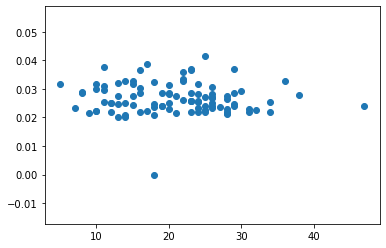

[[ 5.87944456e+01 -2.89220670e-03]
 [-2.89220670e-03  3.00794206e-05]]
Spearmans correlation: -0.110
p value: 0.2797
Accept null hypothesis that the means are equal.


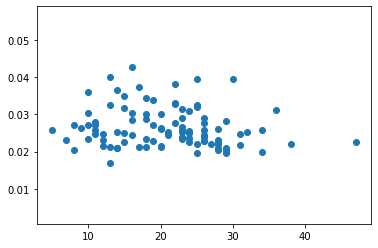

[[ 5.87944456e+01 -5.96646544e-03]
 [-5.96646544e-03  2.81659677e-05]]
Spearmans correlation: -0.192
p value: 0.0580
Accept null hypothesis that the means are equal.


In [22]:
# nonsocial_decisionprice_mean // AQ
pyplot.scatter(aq['AQ'],rej['nonsocial_decisionprice_mean'])
pyplot.show()
covariance = cov(aq['AQ'],rej['nonsocial_decisionprice_mean'])
print(covariance)
corr, _ = spearmanr(aq['AQ'],rej['nonsocial_decisionprice_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(aq['AQ'],rej['nonsocial_decisionprice_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
    
pyplot.scatter(aq['AQ'],acc['nonsocial_decisionprice_mean'])
pyplot.show()
covariance = cov(aq['AQ'],acc['nonsocial_decisionprice_mean'])
print(covariance)
corr, _ = spearmanr(aq['AQ'],acc['nonsocial_decisionprice_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(aq['AQ'],acc['nonsocial_decisionprice_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

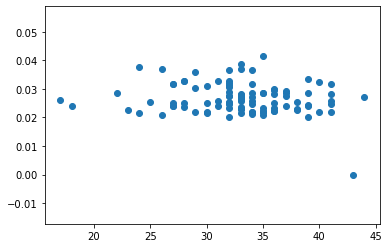

[[ 2.55351357e+01 -4.61894873e-03]
 [-4.61894873e-03  3.00794206e-05]]
Spearmans correlation: -0.117
p value: 0.2527
Accept null hypothesis that the means are equal.


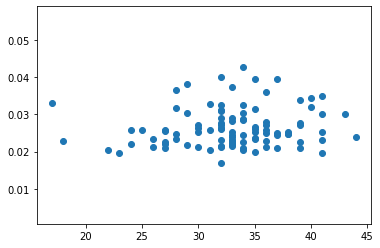

[[2.55351357e+01 3.32509595e-03]
 [3.32509595e-03 2.81659677e-05]]
Spearmans correlation: 0.137
p value: 0.1796
Accept null hypothesis that the means are equal.


In [23]:
# nonsocial_decisionprice_mean // NTBS
pyplot.scatter(ntbs['NTBS_score'],rej['nonsocial_decisionprice_mean'])
pyplot.show()
covariance = cov(ntbs['NTBS_score'],rej['nonsocial_decisionprice_mean'])
print(covariance)
corr, _ = spearmanr(ntbs['NTBS_score'],rej['nonsocial_decisionprice_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(ntbs['NTBS_score'],rej['nonsocial_decisionprice_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
    
pyplot.scatter(ntbs['NTBS_score'],acc['nonsocial_decisionprice_mean'])
pyplot.show()
covariance = cov(ntbs['NTBS_score'],acc['nonsocial_decisionprice_mean'])
print(covariance)
corr, _ = spearmanr(ntbs['NTBS_score'],acc['nonsocial_decisionprice_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(ntbs['NTBS_score'],acc['nonsocial_decisionprice_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

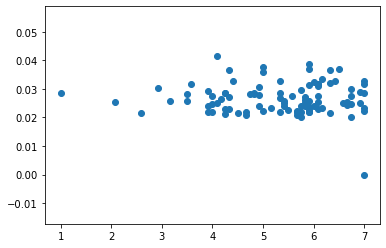

[[ 1.40585551e+00 -2.85630029e-04]
 [-2.85630029e-04  3.00794206e-05]]
Spearmans correlation: 0.043
p value: 0.6776
Accept null hypothesis that the means are equal.


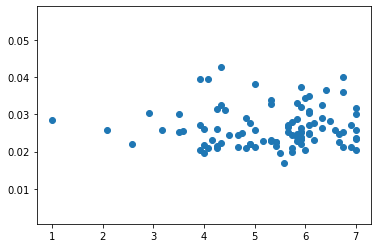

[[1.40585551e+00 1.37606515e-04]
 [1.37606515e-04 2.81659677e-05]]
Spearmans correlation: 0.101
p value: 0.3245
Accept null hypothesis that the means are equal.


In [24]:
# nonsocial_decisionprice_mean // MSPSS
pyplot.scatter(mspss['MSPSS_score'],rej['nonsocial_decisionprice_mean'])
pyplot.show()
covariance = cov(mspss['MSPSS_score'],rej['nonsocial_decisionprice_mean'])
print(covariance)
corr, _ = spearmanr(mspss['MSPSS_score'],rej['nonsocial_decisionprice_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(mspss['MSPSS_score'],rej['nonsocial_decisionprice_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
    
pyplot.scatter(mspss['MSPSS_score'],acc['nonsocial_decisionprice_mean'])
pyplot.show()
covariance = cov(mspss['MSPSS_score'],acc['nonsocial_decisionprice_mean'])
print(covariance)
corr, _ = spearmanr(mspss['MSPSS_score'],acc['nonsocial_decisionprice_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(mspss['MSPSS_score'],acc['nonsocial_decisionprice_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

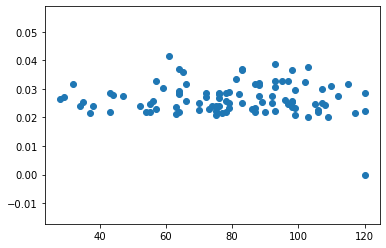

[[ 5.10737745e+02 -6.77881267e-03]
 [-6.77881267e-03  3.00794206e-05]]
Spearmans correlation: 0.008
p value: 0.9342
Accept null hypothesis that the means are equal.


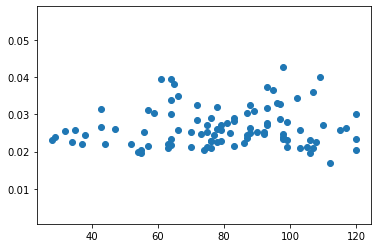

[[5.10737745e+02 1.03933006e-02]
 [1.03933006e-02 2.81659677e-05]]
Spearmans correlation: 0.088
p value: 0.3912
Accept null hypothesis that the means are equal.


In [25]:
# nonsocial_decisionprice_mean // SCS

pyplot.scatter(scs['SCS_score'],rej['nonsocial_decisionprice_mean'])
pyplot.show()
covariance = cov(scs['SCS_score'],rej['nonsocial_decisionprice_mean'])
print(covariance)
corr, _ = spearmanr(scs['SCS_score'],rej['nonsocial_decisionprice_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(scs['SCS_score'],rej['nonsocial_decisionprice_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
    
pyplot.scatter(scs['SCS_score'],acc['nonsocial_decisionprice_mean'])
pyplot.show()
covariance = cov(scs['SCS_score'],acc['nonsocial_decisionprice_mean'])
print(covariance)
corr, _ = spearmanr(scs['SCS_score'],acc['nonsocial_decisionprice_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(scs['SCS_score'],acc['nonsocial_decisionprice_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

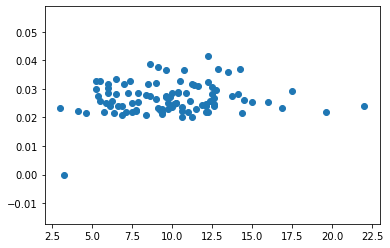

[[1.16294462e+01 2.18994260e-03]
 [2.18994260e-03 3.00794206e-05]]
Spearmans correlation: 0.070
p value: 0.4949
Accept null hypothesis that the means are equal.


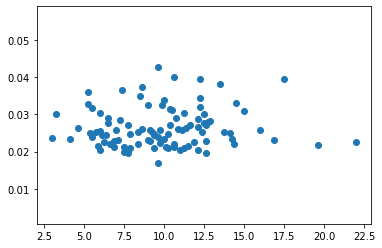

[[1.16294462e+01 1.18168702e-03]
 [1.18168702e-03 2.81659677e-05]]
Spearmans correlation: 0.075
p value: 0.4630
Accept null hypothesis that the means are equal.


In [26]:
# nonsocial_decisionprice_mean // RSQ

pyplot.scatter(rsq['RSQ_finalscore'],rej['nonsocial_decisionprice_mean'])
pyplot.show()
covariance = cov(rsq['RSQ_finalscore'],rej['nonsocial_decisionprice_mean'])
print(covariance)
corr, _ = spearmanr(rsq['RSQ_finalscore'],rej['nonsocial_decisionprice_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(rsq['RSQ_finalscore'],rej['nonsocial_decisionprice_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
    
pyplot.scatter(rsq['RSQ_finalscore'],acc['nonsocial_decisionprice_mean'])
pyplot.show()
covariance = cov(rsq['RSQ_finalscore'],acc['nonsocial_decisionprice_mean'])
print(covariance)
corr, _ = spearmanr(rsq['RSQ_finalscore'],acc['nonsocial_decisionprice_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(rsq['RSQ_finalscore'],acc['nonsocial_decisionprice_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

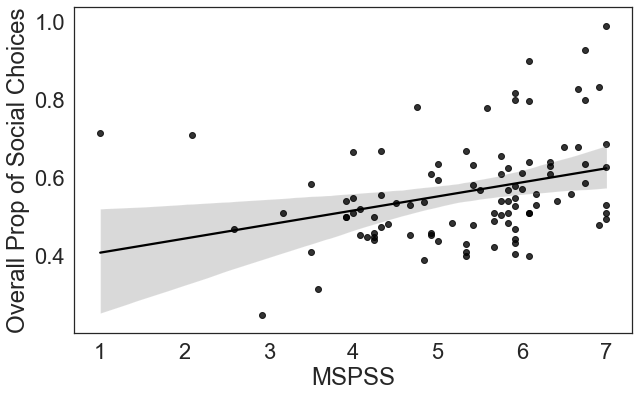

In [50]:
# MSPSS and Overall Social Choice Proportion in Rejection

sns.set(font_scale=2)
sns.set_style('white')
plt.figure(figsize=(10,6))

mspss_rej_overall_prop_social_choice_scatter = pd.DataFrame({
    'mspss_': mspss['MSPSS_score'],
    'rej_overall_prop_social_choice_': rej['overall_prop_social_choice']
})

r = scipy.stats.spearmanr(a=mspss_rej_overall_prop_social_choice_scatter.mspss_, b=mspss_rej_overall_prop_social_choice_scatter.rej_overall_prop_social_choice_)[0]
mspss_rej_overall_prop_social_choice_scatter = sns.regplot(x= "mspss_", y= "rej_overall_prop_social_choice_", data= mspss_rej_overall_prop_social_choice_scatter, scatter_kws={"color": "black"}, line_kws={"color": "black"})
mspss_rej_overall_prop_social_choice_scatter.set_ylabel('Overall Prop of Social Choices')
mspss_rej_overall_prop_social_choice_scatter.set_xlabel('MSPSS')
plt.savefig('mspss_overall_prop_social_choice_scatter.png',bbox_inches='tight')


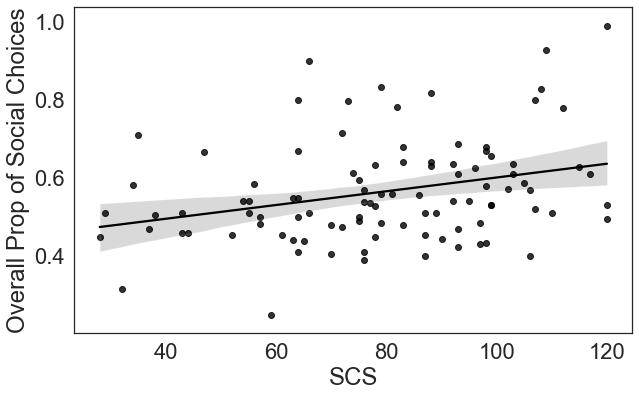

In [52]:
# SCS and Overall Social Choice Proportion in Rejection

sns.set(font_scale=2)
sns.set_style('white')
plt.figure(figsize=(10,6))

scs_rej_overall_prop_social_choice_scatter = pd.DataFrame({
    'scs_': scs['SCS_score'],
    'rej_overall_prop_social_choice_': rej['overall_prop_social_choice']
})

r = scipy.stats.spearmanr(a=scs_rej_overall_prop_social_choice_scatter.scs_, b=scs_rej_overall_prop_social_choice_scatter.rej_overall_prop_social_choice_)[0]
scs_rej_overall_prop_social_choice_scatter = sns.regplot(x= "scs_", y= "rej_overall_prop_social_choice_", data= scs_rej_overall_prop_social_choice_scatter, scatter_kws={"color": "black"}, line_kws={"color": "black"})
scs_rej_overall_prop_social_choice_scatter.set_ylabel('Overall Prop of Social Choices')
scs_rej_overall_prop_social_choice_scatter.set_xlabel('SCS')
plt.savefig('scs_overall_prop_social_choice_scatter.png',bbox_inches='tight')


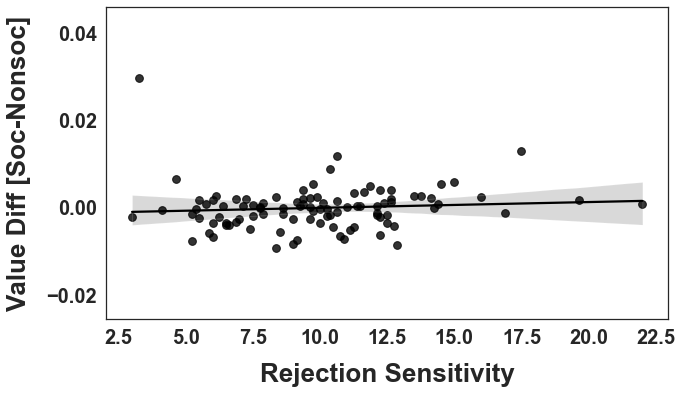

In [6]:
# Set plotting aesthetics
sns.set(font_scale=2)
sns.set_style('white')

# Prepare the figure
plt.figure(figsize=(10, 6))

# Combine data into a DataFrame for clarity
rsq_rej_valuediff_df = pd.DataFrame({
    'RSQ': rsq['RSQ_finalscore'],
    'rej_valuediff_mean': rej['valuediff_mean']
})

# Calculate Spearman correlation
spearman_corr, spearman_pval = stats.spearmanr(
    rsq_rej_valuediff_df['RSQ'], 
    rsq_rej_valuediff_df['rej_valuediff_mean']
)

# Create scatter plot with regression line
ax = sns.regplot(
    x='RSQ',
    y='rej_valuediff_mean',
    data=rsq_rej_valuediff_df,
    scatter_kws={'color': 'black', 's': 60},
    line_kws={'color': 'black'}
)

# Set labels with bold font and added space
ax.set_xlabel('Rejection Sensitivity', fontsize=26, fontweight='bold', labelpad=15)
ax.set_ylabel('Value Diff [Soc-Nonsoc]', fontsize=26, fontweight='bold', labelpad=15)

# Set tick label size and make them bold
ax.tick_params(axis='both', labelsize=20, width=1.5)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight('bold')

# Save figure
plt.tight_layout()
plt.savefig('rsq_rej_valuediff_scatter.png', bbox_inches='tight')




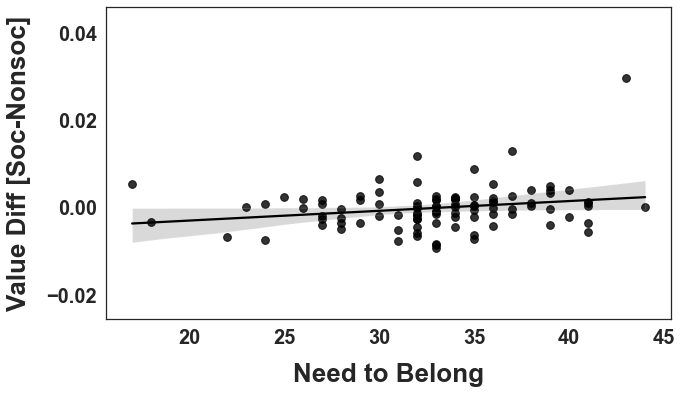

In [7]:
# Set plotting aesthetics
sns.set(font_scale=2)
sns.set_style('white')

# Prepare the figure
plt.figure(figsize=(10, 6))

# Combine data into a DataFrame for clarity
ntbs_rej_valuediff_df = pd.DataFrame({
    'NTBS': ntbs['NTBS_score'],
    'rej_valuediff_mean': rej['valuediff_mean']
})

# Calculate Spearman correlation
spearman_corr, spearman_pval = stats.spearmanr(
    ntbs_rej_valuediff_df['NTBS'], 
    ntbs_rej_valuediff_df['rej_valuediff_mean']
)

# Create scatter plot with regression line
ax = sns.regplot(
    x='NTBS',
    y='rej_valuediff_mean',
    data=ntbs_rej_valuediff_df,
    scatter_kws={'color': 'black', 's': 60},
    line_kws={'color': 'black'}
)

# Set labels with bold text and space between axes
ax.set_xlabel('Need to Belong', fontsize=26, fontweight='bold', labelpad=15)
ax.set_ylabel('Value Diff [Soc-Nonsoc]', fontsize=26, fontweight='bold', labelpad=15)

# Set bold tick labels
ax.tick_params(axis='both', labelsize=20, width=1.5)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight('bold')

# Save figure
plt.tight_layout()
plt.savefig('ntbs_rej_valuediff_scatter.png', bbox_inches='tight')



Text(0.5, 0, 'RSQ Score')

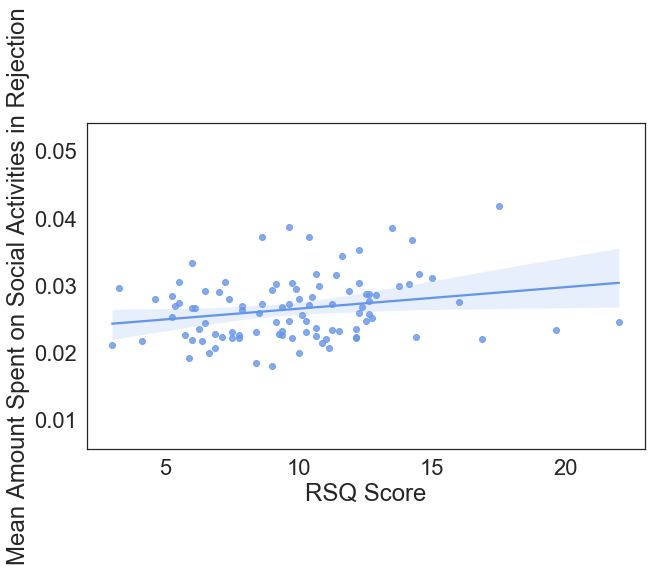

In [28]:
# RSQ and Mean Amount Spent on Social Condition in Rejection
sns.set(font_scale=2)
sns.set_style('white')
plt.figure(figsize=(10,6))

rsq_rej_social_decisionprice_mean_scatter = pd.DataFrame({
    'rsq_': rsq['RSQ_finalscore'],
    'rej_social_decisionprice_mean_': rej['social_decisionprice_mean']
})

r = scipy.stats.spearmanr(a=rsq_rej_social_decisionprice_mean_scatter.rsq_, b=rsq_rej_social_decisionprice_mean_scatter.rej_social_decisionprice_mean_)[0]
ntbs_overallaffect_scatter = sns.regplot(x= "rsq_", y= "rej_social_decisionprice_mean_", data= rsq_rej_social_decisionprice_mean_scatter, scatter_kws={"color": "cornflowerblue"}, line_kws={"color": "cornflowerblue"})
ntbs_overallaffect_scatter.set_ylabel('Mean Amount Spent on Social Activities in Rejection')
ntbs_overallaffect_scatter.set_xlabel('RSQ Score')

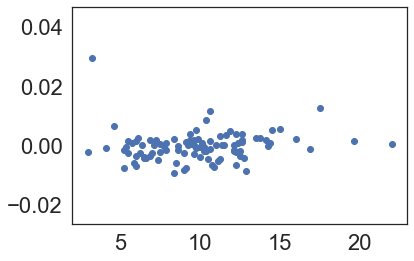

[[1.16294462e+01 1.53629764e-03]
 [1.53629764e-03 2.50126493e-05]]
Spearmans correlation: 0.230
p value: 0.0225
Reject the null hypothesis that the means are equal.


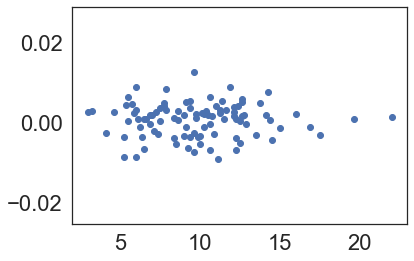

[[1.16294462e+01 1.14159130e-04]
 [1.14159130e-04 1.76689972e-05]]
Spearmans correlation: -0.006
p value: 0.9497
Accept null hypothesis that the means are equal.


In [29]:
# valuediff_mean // RSQ

pyplot.scatter(rsq['RSQ_finalscore'],rej['valuediff_mean'])
pyplot.show()
covariance = cov(rsq['RSQ_finalscore'],rej['valuediff_mean'])
print(covariance)
corr, _ = spearmanr(rsq['RSQ_finalscore'],rej['valuediff_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(rsq['RSQ_finalscore'],rej['valuediff_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
    
pyplot.scatter(rsq['RSQ_finalscore'],acc['valuediff_mean'])
pyplot.show()
covariance = cov(rsq['RSQ_finalscore'],acc['valuediff_mean'])
print(covariance)
corr, _ = spearmanr(rsq['RSQ_finalscore'],acc['valuediff_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(rsq['RSQ_finalscore'],acc['valuediff_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

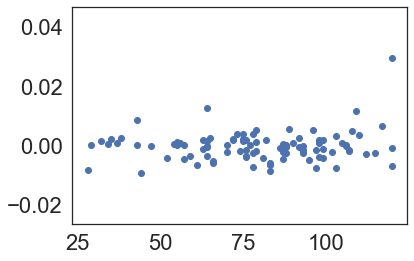

[[5.10737745e+02 1.36215484e-02]
 [1.36215484e-02 2.50126493e-05]]
Spearmans correlation: -0.007
p value: 0.9452
Accept null hypothesis that the means are equal.


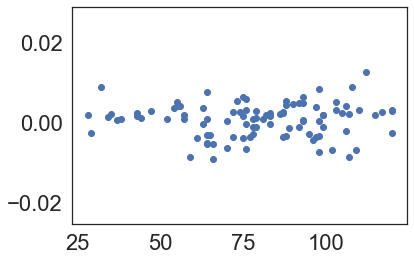

[[5.10737745e+02 2.52730517e-03]
 [2.52730517e-03 1.76689972e-05]]
Spearmans correlation: 0.062
p value: 0.5423
Accept null hypothesis that the means are equal.


In [30]:
# valuediff_mean // SCS

pyplot.scatter(scs['SCS_score'],rej['valuediff_mean'])
pyplot.show()
covariance = cov(scs['SCS_score'],rej['valuediff_mean'])
print(covariance)
corr, _ = spearmanr(scs['SCS_score'],rej['valuediff_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(scs['SCS_score'],rej['valuediff_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
    
pyplot.scatter(scs['SCS_score'],acc['valuediff_mean'])
pyplot.show()
covariance = cov(scs['SCS_score'],acc['valuediff_mean'])
print(covariance)
corr, _ = spearmanr(scs['SCS_score'],acc['valuediff_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(scs['SCS_score'],acc['valuediff_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

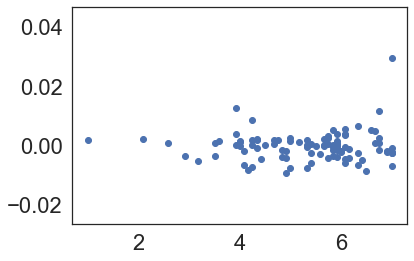

[[1.40585551e+00 3.16426792e-04]
 [3.16426792e-04 2.50126493e-05]]
Spearmans correlation: -0.050
p value: 0.6238
Accept null hypothesis that the means are equal.


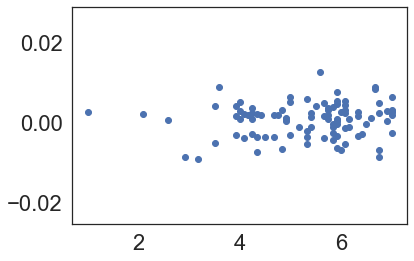

[[1.40585551e+00 5.20132299e-04]
 [5.20132299e-04 1.76689972e-05]]
Spearmans correlation: 0.095
p value: 0.3497
Accept null hypothesis that the means are equal.


In [31]:
# valuediff_mean // MSPSS
pyplot.scatter(mspss['MSPSS_score'],rej['valuediff_mean'])
pyplot.show()
covariance = cov(mspss['MSPSS_score'],rej['valuediff_mean'])
print(covariance)
corr, _ = spearmanr(mspss['MSPSS_score'],rej['valuediff_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(mspss['MSPSS_score'],rej['valuediff_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
    
pyplot.scatter(mspss['MSPSS_score'],acc['valuediff_mean'])
pyplot.show()
covariance = cov(mspss['MSPSS_score'],acc['valuediff_mean'])
print(covariance)
corr, _ = spearmanr(mspss['MSPSS_score'],acc['valuediff_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(mspss['MSPSS_score'],acc['valuediff_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

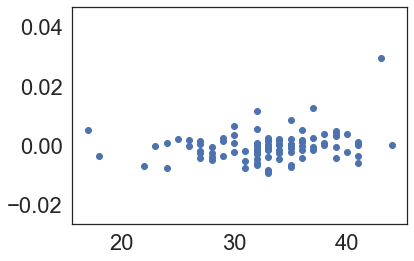

[[2.55351357e+01 5.70071745e-03]
 [5.70071745e-03 2.50126493e-05]]
Spearmans correlation: 0.211
p value: 0.0373
Reject the null hypothesis that the means are equal.


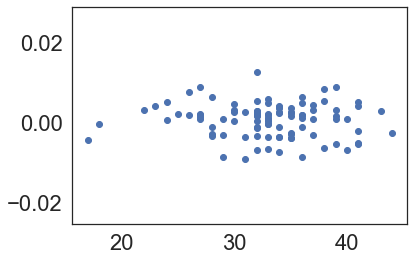

[[ 2.55351357e+01 -1.54495722e-03]
 [-1.54495722e-03  1.76689972e-05]]
Spearmans correlation: -0.056
p value: 0.5814
Accept null hypothesis that the means are equal.


In [32]:
# valuediff_mean // NTBS
pyplot.scatter(ntbs['NTBS_score'],rej['valuediff_mean'])
pyplot.show()
covariance = cov(ntbs['NTBS_score'],rej['valuediff_mean'])
print(covariance)
corr, _ = spearmanr(ntbs['NTBS_score'],rej['valuediff_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(ntbs['NTBS_score'],rej['valuediff_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
    
pyplot.scatter(ntbs['NTBS_score'],acc['valuediff_mean'])
pyplot.show()
covariance = cov(ntbs['NTBS_score'],acc['valuediff_mean'])
print(covariance)
corr, _ = spearmanr(ntbs['NTBS_score'],acc['valuediff_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(ntbs['NTBS_score'],acc['valuediff_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

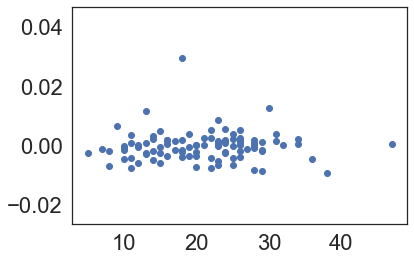

[[5.87944456e+01 8.58302564e-04]
 [8.58302564e-04 2.50126493e-05]]
Spearmans correlation: 0.116
p value: 0.2546
Accept null hypothesis that the means are equal.


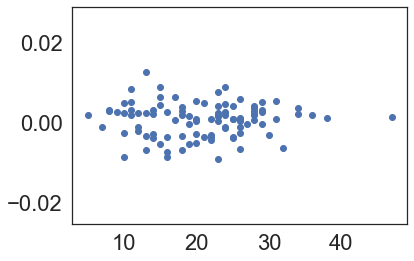

[[5.87944456e+01 6.44363663e-04]
 [6.44363663e-04 1.76689972e-05]]
Spearmans correlation: 0.004
p value: 0.9705
Accept null hypothesis that the means are equal.


In [33]:
# valuediff_mean // AQ
pyplot.scatter(aq['AQ'],rej['valuediff_mean'])
pyplot.show()
covariance = cov(aq['AQ'],rej['valuediff_mean'])
print(covariance)
corr, _ = spearmanr(aq['AQ'],rej['valuediff_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(aq['AQ'],rej['valuediff_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
    
pyplot.scatter(aq['AQ'],acc['valuediff_mean'])
pyplot.show()
covariance = cov(aq['AQ'],acc['valuediff_mean'])
print(covariance)
corr, _ = spearmanr(aq['AQ'],acc['valuediff_mean'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(aq['AQ'],acc['valuediff_mean'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

Text(0.5, 0, 'RSQ Score')

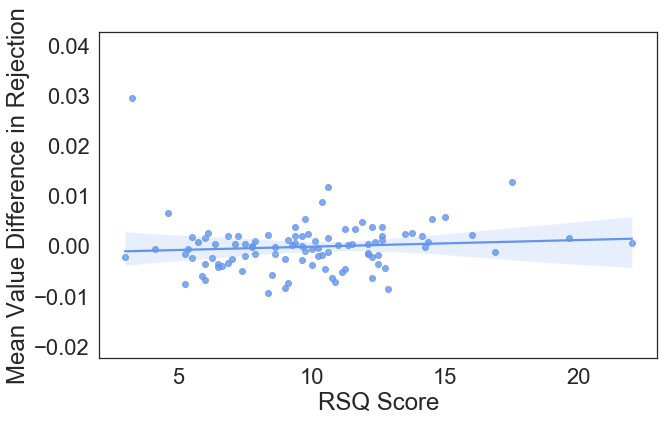

In [34]:
# RSQ and Mean Value Difference in Rejection
sns.set(font_scale=2)
sns.set_style('white')
plt.figure(figsize=(10,6))

rsq_rej_valuediff_mean_scatter = pd.DataFrame({
    'rsq_': rsq['RSQ_finalscore'],
    'rej_valuediff_mean_': rej['valuediff_mean']
})

r = scipy.stats.spearmanr(a=rsq_rej_valuediff_mean_scatter.rsq_, b=rsq_rej_valuediff_mean_scatter.rej_valuediff_mean_)[0]
ntbs_overallaffect_scatter = sns.regplot(x= "rsq_", y= "rej_valuediff_mean_", data= rsq_rej_valuediff_mean_scatter, scatter_kws={"color": "cornflowerblue"}, line_kws={"color": "cornflowerblue"})
ntbs_overallaffect_scatter.set_ylabel('Mean Value Difference in Rejection')
ntbs_overallaffect_scatter.set_xlabel('RSQ Score')

Text(0.5, 0, 'NTBS Score')

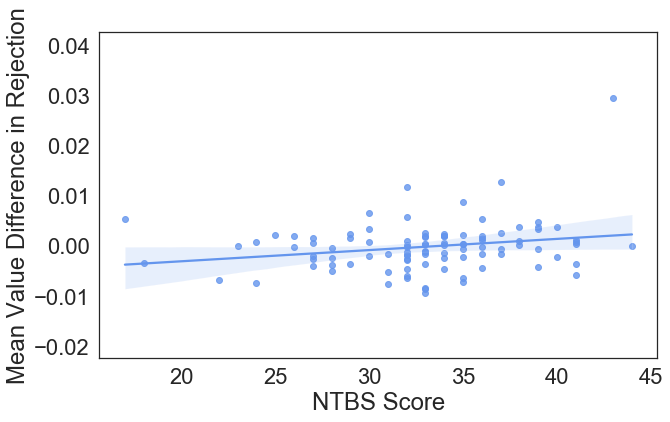

In [35]:
# NTBS and Mean Value Difference in Rejection
sns.set(font_scale=2)
sns.set_style('white')
plt.figure(figsize=(10,6))

ntbs_rej_valuediff_mean_scatter = pd.DataFrame({
    'ntbs_': ntbs['NTBS_score'],
    'rej_valuediff_mean_': rej['valuediff_mean']
})

r = scipy.stats.spearmanr(a=ntbs_rej_valuediff_mean_scatter.ntbs_, b=ntbs_rej_valuediff_mean_scatter.rej_valuediff_mean_)[0]
ntbs_overallaffect_scatter = sns.regplot(x= "ntbs_", y= "rej_valuediff_mean_", data= ntbs_rej_valuediff_mean_scatter, scatter_kws={"color": "cornflowerblue"}, line_kws={"color": "cornflowerblue"})
ntbs_overallaffect_scatter.set_ylabel('Mean Value Difference in Rejection')
ntbs_overallaffect_scatter.set_xlabel('NTBS Score')

In [67]:
rej.to_csv('rej.csv', index=False)


In [68]:
print(len(rej))

98
